In [332]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve
from scipy.special import expit


### Simulate Data

In [341]:
def simulate(sigma_scale_factor=1, n=[10000, 10000]):
    mu = [[0,0],[0,0]]
    sigma = [np.diag([1,1]),np.diag(np.dot([1,1], sigma_scale_factor))]
    rounding_thresh = [.5,.5]

    X = np.array([])
    y=np.array([])

    for i in range(len(n)):
        ax = np.random.multivariate_normal(mu[i],sigma[i],size=n[i])
        X=np.append(X.reshape((-1,2)),ax,axis=0)

        aeta = np.random.normal(0,1)
        theta = [[1,1] for _ in range(n[i])]
        ap = expit(np.sum(theta*ax, axis=1) + aeta)
        ay = np.array(ap >= rounding_thresh[i], dtype=int)
        y=np.append(y,ay,axis=0)
    
    return X, y
    

### Regression and Plot

[array([[1, 0],
       [0, 1]]), array([[0.01, 0.  ],
       [0.  , 0.01]])]
[array([[1, 0],
       [0, 1]]), array([[0.1, 0. ],
       [0. , 0.1]])]
[array([[1, 0],
       [0, 1]]), array([[1, 0],
       [0, 1]])]
[array([[1, 0],
       [0, 1]]), array([[10,  0],
       [ 0, 10]])]
[array([[1, 0],
       [0, 1]]), array([[100,   0],
       [  0, 100]])]
[array([[1, 0],
       [0, 1]]), array([[0.01, 0.  ],
       [0.  , 0.01]])]
[array([[1, 0],
       [0, 1]]), array([[0.1, 0. ],
       [0. , 0.1]])]
[array([[1, 0],
       [0, 1]]), array([[1, 0],
       [0, 1]])]
[array([[1, 0],
       [0, 1]]), array([[10,  0],
       [ 0, 10]])]
[array([[1, 0],
       [0, 1]]), array([[100,   0],
       [  0, 100]])]
[array([[1, 0],
       [0, 1]]), array([[0.01, 0.  ],
       [0.  , 0.01]])]
[array([[1, 0],
       [0, 1]]), array([[0.1, 0. ],
       [0. , 0.1]])]
[array([[1, 0],
       [0, 1]]), array([[1, 0],
       [0, 1]])]
[array([[1, 0],
       [0, 1]]), array([[10,  0],
       [ 0, 10]])]
[a

/Users/nswinger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/Users/nswinger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/Users/nswinger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/Users/nswinger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/Users/nswinger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value 

[array([[1, 0],
       [0, 1]]), array([[0.1, 0. ],
       [0. , 0.1]])]
[array([[1, 0],
       [0, 1]]), array([[1, 0],
       [0, 1]])]
[array([[1, 0],
       [0, 1]]), array([[10,  0],
       [ 0, 10]])]
[array([[1, 0],
       [0, 1]]), array([[100,   0],
       [  0, 100]])]
[array([[1, 0],
       [0, 1]]), array([[0.01, 0.  ],
       [0.  , 0.01]])]


/Users/nswinger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


[array([[1, 0],
       [0, 1]]), array([[0.1, 0. ],
       [0. , 0.1]])]
[array([[1, 0],
       [0, 1]]), array([[1, 0],
       [0, 1]])]
[array([[1, 0],
       [0, 1]]), array([[10,  0],
       [ 0, 10]])]
[array([[1, 0],
       [0, 1]]), array([[100,   0],
       [  0, 100]])]


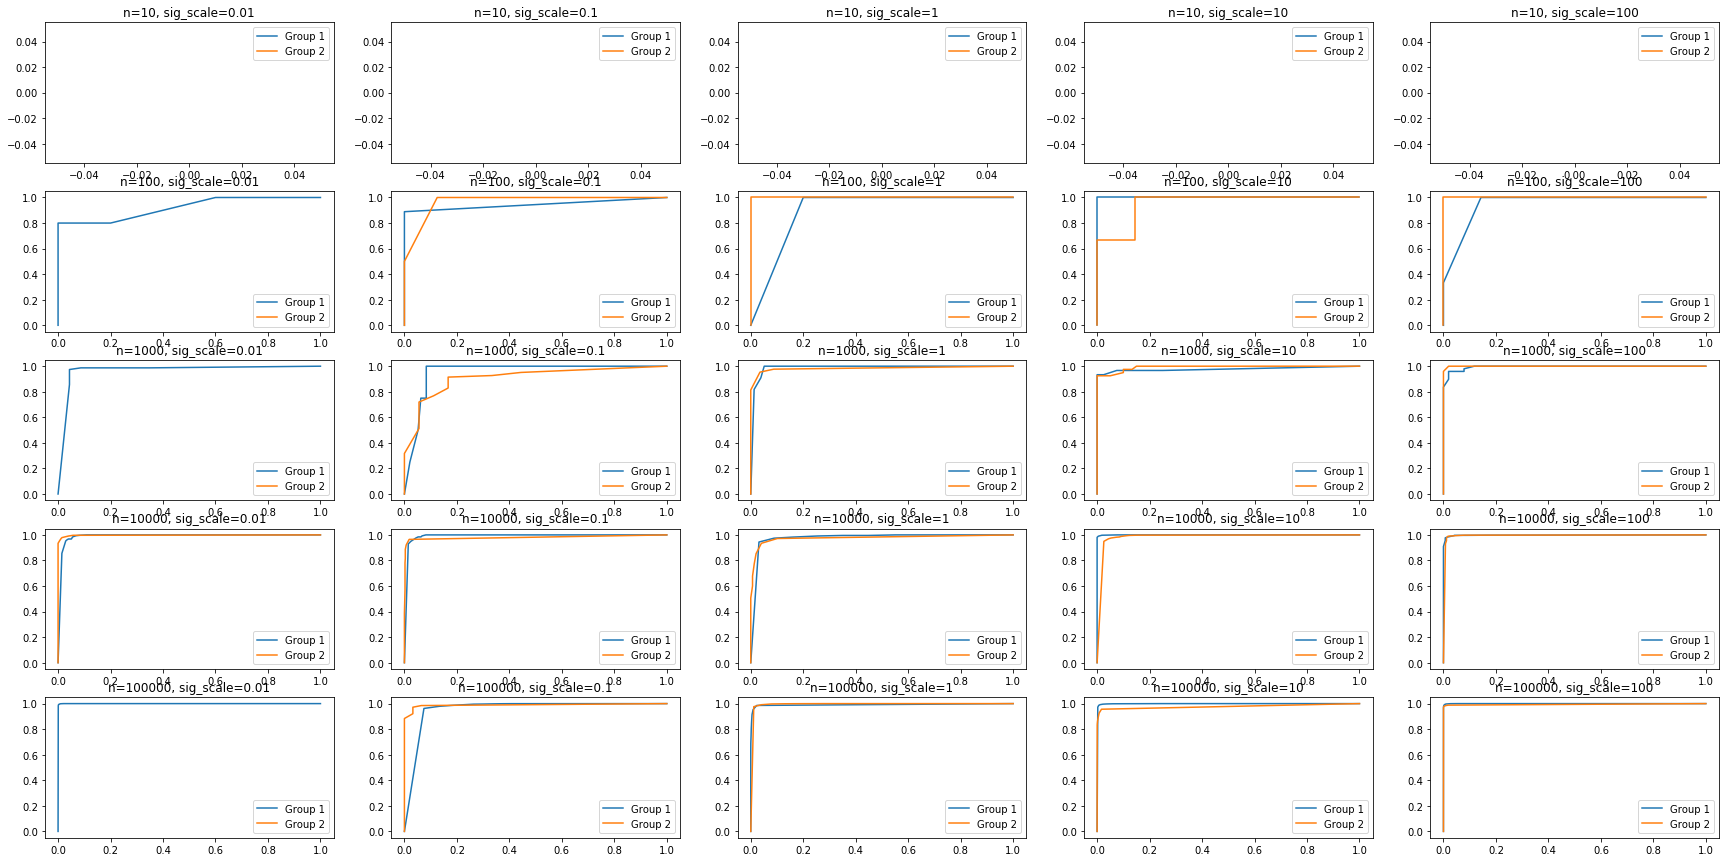

In [340]:

ns = [10**i for i in range(1,6)]
sigs = [10**i for i in range(-2,3)]
fig, axs = plt.subplots(len(ns), len(sigs), figsize=(30,15))

for row, a_n in enumerate(ns):
    for col, a_s in enumerate(sigs):
        
        n = [a_n//2, a_n//2]
        X, y = simulate(sigma_scale_factor=a_s, n=n)

        X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X[:n[0]], y[:n[0]], test_size=0.2, random_state=0)
        X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X[n[0]:], y[n[0]:], test_size=0.2, random_state=0)

        X_train = np.append(X_train_0,X_train_1,axis=0)
        y_train = np.append(y_train_0,y_train_1,axis=0)


        regressor = RandomForestRegressor(n_estimators = 10, random_state=0)
        # regressor = LinearRegression()
        regressor.fit(X_train, y_train)

        y_pred_0 = regressor.predict(X_test_0)
        y_pred_1 = regressor.predict(X_test_1)
        
        fpr_0, tpr_0, _ = roc_curve(y_test_0, y_pred_0)
        fpr_1, tpr_1, _ = roc_curve(y_test_1, y_pred_1)
        
        axs[row, col].plot(fpr_0, tpr_0, label='Group 1')
        axs[row, col].plot(fpr_1, tpr_1, label='Group 2')
        axs[row, col].legend()
        axs[row, col].set_title("n="+str(sum(n))+", sig_scale="+str(a_s))


In [307]:
ns = [10**i for i in range(1,7)]
sigs = [10**i for i in range(-1,4)]

ns, sigs

([10, 100, 1000, 10000, 100000, 1000000], [0.1, 1, 10, 100, 1000])